Importing all the necessary libraries.

In [74]:
import pandas as pd
import numpy as np

import seaborn as sns

In [75]:
#!wget https://www.kaggle.com/datasets/camnugent/california-housing-prices?select=housing.csv

Reading the data

In [76]:
df_data = pd.read_csv("california-housing-prices.csv")

To have a look

In [77]:
df_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Checking the missing values

In [78]:
df_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Plotting histogram of the column of interest

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

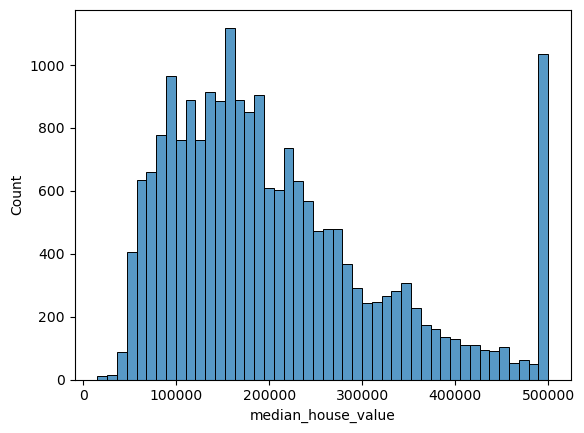

In [79]:
sns.histplot(df_data['median_house_value'])

Choosing the columns we need for the training

In [80]:

df_data = df_data[['longitude', 
'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']]

Printing median of the population

In [102]:
print(f"Median of the population is: {df_data['population'].median()}")

Median of the population is: 1166.0


In [82]:
df_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Now we have to spliit original data in to the following tables: \\

val <- these values are compared values generated by the model after "consuming" test data, so difference shows how well model performs! \\

test <- these are data, which model hasn't seen, we will apply and generate values. \\

train <- this is used for training for our model \\


we also need to shuffle the data, in the order to more even distribution and random statistics...

In [103]:
n = df_data.shape[0]

n_val = int(0.2 * n)
n_test =  int(0.2 * n)
n_train = n - (n_val + n_test)

print(n, n_val, n_test, n_train)

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

20640 4128 4128 12384


Here happens the data split

we also reset index, not to have random indexes

In [104]:
df_train = df_data.iloc[idx[:n_train]].copy()
df_val = df_data.iloc[idx[n_train:n_train + n_val]].copy()
df_test = df_data.iloc[idx[n_train + n_val:]].copy()

df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
print(df_test.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -120.26     37.13                33.0       1239.0           250.0   
1    -117.91     33.86                26.0       2296.0           570.0   
2    -118.36     34.04                48.0       1769.0           429.0   
3    -118.15     34.69                32.0       1300.0           234.0   
4    -119.97     38.93                24.0        856.0           185.0   

   population  households  median_income  median_house_value  
0       648.0       227.0         2.0278             58800.0  
1      1415.0       527.0         2.4732            165800.0  
2       993.0       405.0         2.3214            139400.0  
3       712.0       249.0         3.2500            107500.0  
4       388.0       108.0         3.1806            107200.0  


Applying log1p transformation for target values, no idea yet why

In [105]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe

deleting column from dataframe, in place, so it is not neccesary to reassign

In [106]:
df_train.drop('median_house_value', axis=1, inplace=True)
df_test.drop('median_house_value', axis=1, inplace=True)
df_val.drop('median_house_value', axis=1, inplace=True)

In [88]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250


In [109]:
#df_train.isnull().sum()

In [108]:
#df_test.isnull().sum()

In [107]:
#df_val.isnull().sum()

In [110]:
#df_val.head()

In [116]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [130]:
#Filling the missing data with 0
def filler_X_0(data):
    data = data.fillna(0)
    X = data.values
    return X

mean_for_filling = df_train.mean()
print(mean_for_filling)

def filler_X_mean(data):
    data = data.fillna(mean_for_filling)
    X = data.values
    return X

longitude             -119.555670
latitude                35.610346
housing_median_age      28.699855
total_rooms           2619.001453
total_bedrooms         533.480332
population            1413.292151
households             495.653666
median_income            3.871533
dtype: float64


In [128]:
X_train = filler_X_0(df_train)
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)
print(f"RMSE score when filling missing values with 0 is: {round(rmse(y_train, y_pred), 2)}")

RMSE score when filling missing values with 0 is: 0.34


In [131]:
X_train = filler_X_mean(df_train)
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)
print(f"RMSE score with mean is: {round(rmse(y_train, y_pred), 2)}")

RMSE score with mean is: 0.34


in the case of 0 - RMSE score: 0.34
in the case of mean - RMSE score: 0.34

In [132]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [133]:
# question 4,. which r gives the best RMSE?
# fill missing values with 0
X_train = filler_X_0(df_train)
X_val = filler_X_0(df_val)

r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
train_rmses = []
val_rmses = []

for r in r_values:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred_train = w_0 + X_train.dot(w)
    y_pred_val = w_0 + X_val.dot(w)
    print('r = {0}, w_0 = {1}, w[1:]= {2}'.format(r, w_0, w[1:]))
    train_rmses.append(round(rmse(y_train, y_pred_train),2))
    print('train RMSE = {0}'.format(round(rmse(y_train, y_pred_train),2)))
    val_rmses.append(round(rmse(y_val, y_pred_val),2))
    print('val RMSE = {0}'.format(round(rmse(y_val, y_pred_val),2)))

r = 0, w_0 = -11.686975241951535, w[1:]= [-2.82087184e-01  2.91329621e-03 -8.64531514e-06  1.50811922e-04
 -2.08205659e-04  5.69546573e-04  1.71308139e-01]
train RMSE = 0.34
val RMSE = 0.33
r = 1e-06, w_0 = -11.686959176015243, w[1:]= [-2.82087030e-01  2.91329904e-03 -8.64535103e-06  1.50811874e-04
 -2.08205662e-04  5.69546853e-04  1.71308163e-01]
train RMSE = 0.34
val RMSE = 0.33
r = 0.0001, w_0 = -11.685368865560173, w[1:]= [-2.82071863e-01  2.91357892e-03 -8.64890458e-06  1.50807091e-04
 -2.08205964e-04  5.69574487e-04  1.71310631e-01]
train RMSE = 0.34
val RMSE = 0.33
r = 0.001, w_0 = -11.670931318018726, w[1:]= [-2.81934164e-01  2.91611982e-03 -8.68116523e-06  1.50763669e-04
 -2.08208710e-04  5.69825364e-04  1.71333037e-01]
train RMSE = 0.34
val RMSE = 0.33
r = 0.01, w_0 = -11.52849358574261, w[1:]= [-2.80575653e-01  2.94118780e-03 -8.99944134e-06  1.50335271e-04
 -2.08235797e-04  5.72300466e-04  1.71554081e-01]
train RMSE = 0.34
val RMSE = 0.33
r = 0.1, w_0 = -10.274500282274886,

In [144]:
seed_lst = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
train_rmses = []
val_rmses = []

n = df_data.shape[0]

for i in seed_lst:
    n_val = int(0.2 * n)
    n_test =  int(0.2 * n)
    n_train = n - (n_val + n_test)
    
    idx = np.arange(n)
    np.random.seed(i)
    np.random.shuffle(idx)

    df_train = df_data.iloc[idx[:n_train]].copy()
    df_val = df_data.iloc[idx[n_train:n_train + n_val]].copy()
    df_test = df_data.iloc[idx[n_train + n_val:]].copy()

    df_train.reset_index(drop=True, inplace=True)
    df_test.reset_index(drop=True, inplace=True)
    df_val.reset_index(drop=True, inplace=True)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    df_train.drop('median_house_value', axis=1, inplace=True)
    df_test.drop('median_house_value', axis=1, inplace=True)
    df_val.drop('median_house_value', axis=1, inplace=True)

    X_train = filler_X_0(df_train)
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred_train = w_0 + X_train.dot(w)

    train_rmses.append(rmse(y_train, y_pred_train))
    
    X_val = filler_X_0(df_val)
    y_pred_val = w_0 + X_val.dot(w)
    
    val_rmses.append(rmse(y_val, y_pred_val))
    
    print('Using seed = {0}, Train RMSE = {1}, Validation RMSE = {2}'.format(i, round(rmse(y_train, y_pred_train), 3), round(rmse(y_val, y_pred_val), 3)))

Using seed = 0, Train RMSE = 0.343, Validation RMSE = 0.339
Using seed = 1, Train RMSE = 0.343, Validation RMSE = 0.336
Using seed = 2, Train RMSE = 0.341, Validation RMSE = 0.332
Using seed = 3, Train RMSE = 0.342, Validation RMSE = 0.341
Using seed = 4, Train RMSE = 0.343, Validation RMSE = 0.339
Using seed = 5, Train RMSE = 0.342, Validation RMSE = 0.343
Using seed = 6, Train RMSE = 0.339, Validation RMSE = 0.345
Using seed = 7, Train RMSE = 0.34, Validation RMSE = 0.34
Using seed = 8, Train RMSE = 0.337, Validation RMSE = 0.347
Using seed = 9, Train RMSE = 0.341, Validation RMSE = 0.337


In [146]:
print('The standard deviation of the Validation RMSEs is {0}'.format(round(np.std(val_rmses),3)))

The standard deviation of the Validation RMSEs is 0.004


In [179]:
np.random.seed(9)

# split the data 60/20/20 

n = df_data.shape[0]

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_data.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()
print(df_train.shape)
print(df_val.shape)

# separate price from the original dataframe
y_train_orig = df_train['median_house_value'].values
y_val_orig = df_val['median_house_value'].values
y_test_orig = df_test['median_house_value'].values
print(y_train_orig.shape)
print(y_val_orig.shape)

y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

df_train.drop('median_house_value', axis=1, inplace=True)
df_test.drop('median_house_value', axis=1, inplace=True)
df_val.drop('median_house_value', axis=1, inplace=True)

# combine training and validation datasets
df_train_val = pd.concat([df_train, df_val])
y_train_val = np.concatenate((y_train, y_val), axis=None)

print(df_train_val.shape)
print(y_train_val.shape)

X_train_val = filler_X_0(df_train_val)
w_0, w = train_linear_regression_reg(X_train_val, y_train_val, r=0.001)
y_train_val_pred = w_0 + X_train_val.dot(w)

print('RMSE on the combined training/validation set is {0}'.format(round(rmse(y_train_val, y_train_val_pred),3)))

X_test = filler_X_0(df_test)
y_test_pred = w_0 + X_test.dot(w)

print('RMSE on the test set is {0}'.format(round(rmse(y_test, y_test_pred),3)))

(12384, 9)
(4128, 9)
(12384,)
(4128,)
(16512, 8)
(16512,)
RMSE on the combined training/validation set is 0.34
RMSE on the test set is 0.345
